In [49]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as Sp
import sklearn
from sklearn import model_selection as skm
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler





In [48]:
data =  pd.read_csv('Data_for_UCI_named.csv')
data.head(10)


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


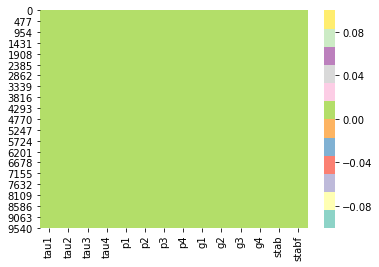

In [2]:
sns.heatmap(data=data.isnull(), cmap='Set3')

In [3]:
CoptData = data.copy()

In [4]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [5]:
data['stabf'].replace('unstable',0,inplace=True)
data['stabf'].replace('stable',1,inplace = True)


In [6]:
dropStab = data.drop('stab',axis = 1)

In [7]:
dropStab

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


In [8]:
# sns.pairplot(data=dropStab)

In [9]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [10]:
dropStab.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [11]:
X_data = dropStab.drop('stabf',axis = 1)
y_data = dropStab['stabf']

In [12]:
data['stabf'].value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

 ## splitting and scaling the data for model
 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

In [14]:
print('Xtrainset is {}\ny_trainset is {}\nXtest is {}\ny_test {}'.format(len(X_train),len(y_train),len(X_test),len(y_test)))

Xtrainset is 8000
y_trainset is 8000
Xtest is 2000
y_test 2000


In [15]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Algo information
Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. 

Also, to improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [16]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9],
min_samples_leaf = [1, 2, 4, 6, 8],
max_features = ['auto', 'sqrt', 'log2', None], 

In [17]:
RFC = RandomForestClassifier(n_estimators = 50,
min_samples_split = 2,#[2, 3, 5, 7, 9],
min_samples_leaf = 2,#[1, 2, 4, 6, 8],
max_features = 'auto')#['auto', 'sqrt', 'log2', None], )

In [18]:
RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)

In [19]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('Precision              = ' + str(sklearn.metrics.precision_score(y_true, y_predicted)))
    print('Accuracy               = ' + str(sklearn.metrics.accuracy_score(y_true, y_predicted)))
   
y_score = RFC.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.079
Root Mean Square Error = 0.2810693864511039
Mean Absolute Error    = 0.079
Median Absolute Error  = 0.0
R^2                    = 0.6554190801870333
Adjusted R^2           = 0.6507011872687016
Precision              = 0.9122023809523809
Accuracy               = 0.921


In [20]:
ETC = ExtraTreesClassifier(n_estimators = 50,
min_samples_split = 2,#[2, 3, 5, 7, 9],
min_samples_leaf = 2,#[1, 2, 4, 6, 8],
max_features = 'auto')


In [21]:
ETC.fit(X_train,y_train)

ExtraTreesClassifier(min_samples_leaf=2, n_estimators=50)

In [47]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('Precision              = ' + str(sklearn.metrics.precision_score(y_true, y_predicted)))
    print('Accuracy               = ' + str(sklearn.metrics.accuracy_score(y_true, y_predicted)))
   
y_score = ETC.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.081
Root Mean Square Error = 0.28460498941515416
Mean Absolute Error    = 0.081
Median Absolute Error  = 0.0
R^2                    = 0.6466955125968317
Adjusted R^2           = 0.6418581793514536
Precision              = 0.9523026315789473
Accuracy               = 0.919


In [23]:
import xgboost


In [24]:
xgb =  xgboost.XGBClassifier()

In [25]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('Precision              = ' + str(sklearn.metrics.precision_score(y_true, y_predicted)))
    print('Accuracy               = ' + str(sklearn.metrics.accuracy_score(y_true, y_predicted)))
   
y_score = xgb.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.0545
Root Mean Square Error = 0.23345235059857505
Mean Absolute Error    = 0.0545
Median Absolute Error  = 0.0
R^2                    = 0.762282783167004
Adjusted R^2           = 0.7590280342549904
Precision              = 0.935064935064935
Accuracy               = 0.9455


In [27]:
import lightgbm
LGBM = lightgbm.LGBMClassifier()
LGBM.fit(X_train,y_train)


LGBMClassifier()

In [28]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('Precision              = ' + str(sklearn.metrics.precision_score(y_true, y_predicted)))
    print('Accuracy               = ' + str(sklearn.metrics.accuracy_score(y_true, y_predicted)))
   
y_score = LGBM.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.0625
Root Mean Square Error = 0.25
Mean Absolute Error    = 0.0625
Median Absolute Error  = 0.0
R^2                    = 0.7273885128061972
Adjusted R^2           = 0.723656002585998
Precision              = 0.9297218155197657
Accuracy               = 0.9375


In [29]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,'max_features': max_features}

In [33]:
# RFCV=sklearn.model_selection.RandomizedSearchCV(RFC,hyperparameter_grid,return_train_score=True)
# RFCV.fit(X_train,y_train)

In [35]:
XGBCV=sklearn.model_selection.RandomizedSearchCV(xgb,hyperparameter_grid,cv=5,return_train_score=True)
RFCV.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(min_samples_leaf=2,
                                                    n_estimators=50),
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   return_train_score=True)

In [36]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('Precision              = ' + str(sklearn.metrics.precision_score(y_true, y_predicted)))
    print('Accuracy               = ' + str(sklearn.metrics.accuracy_score(y_true, y_predicted)))
   
y_score = xgb.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.0545
Root Mean Square Error = 0.23345235059857505
Mean Absolute Error    = 0.0545
Median Absolute Error  = 0.0
R^2                    = 0.762282783167004
Adjusted R^2           = 0.7590280342549904
Precision              = 0.935064935064935
Accuracy               = 0.9455


In [43]:
ETC_CV=sklearn.model_selection.RandomizedSearchCV(ETC,hyperparameter_grid,cv=5,n_iter=10,scoring='accuracy',n_jobs=-1,
                                                  verbose=1,random_state=1,return_train_score=True)
ETC_CV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.8s finished


RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesClassifier(min_samples_leaf=2,
                                                  n_estimators=50),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [44]:
ETC_CV=sklearn.model_selection.RandomizedSearchCV(ETC,hyperparameter_grid,cv=5,n_iter=10,scoring='accuracy',n_jobs=-1,
                                                  verbose=1,random_state=1)
ETC_CV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.7s finished


RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesClassifier(min_samples_leaf=2,
                                                  n_estimators=50),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [41]:
import sklearn.metrics as sklm
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(np.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('Precision              = ' + str(sklearn.metrics.precision_score(y_true, y_predicted)))
    print('Accuracy               = ' + str(sklearn.metrics.accuracy_score(y_true, y_predicted)))
   
y_score = ETC.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.081
Root Mean Square Error = 0.28460498941515416
Mean Absolute Error    = 0.081
Median Absolute Error  = 0.0
R^2                    = 0.6466955125968317
Adjusted R^2           = 0.6418581793514536
Precision              = 0.9523026315789473
Accuracy               = 0.919


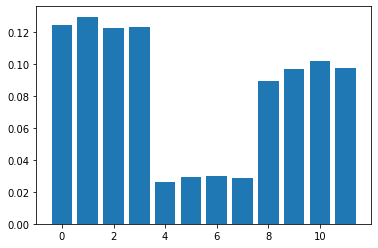

In [45]:
plt.bar(range(len(ETC.feature_importances_)), ETC.feature_importances_)
plt.show()

In [46]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')